# Dust extinction models in Rubix

This notebook shows the basics of the dust extinction models implemented in Rubix. We have closely followed the implementation by the [dust extinction package](https://dust-extinction.readthedocs.io/en/latest/index.html). Currently we only support a subset of all available models.

In [1]:
# NBVAL_SKIP
from rubix.spectra.dust.extinction_models import Cardelli89, Gordon23

In [12]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

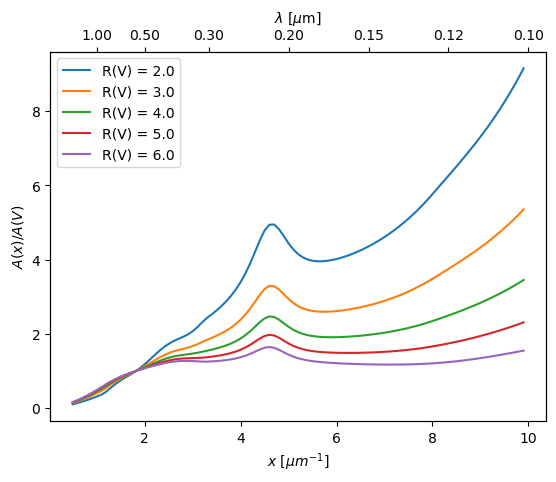

In [3]:
# NBVAL_SKIP
fig, ax = plt.subplots()

# generate the curves and plot them
x = np.arange(0.5,10.0,0.1) # in 1/microns
Rvs = [2.0,3.0,4.0,5.0,6.0]
for cur_Rv in Rvs:
    ext_model = Cardelli89(Rv=cur_Rv)
    ax.plot(x,ext_model(x),label='R(V) = ' + str(cur_Rv))

ax.set_xlabel(r'$x$ [$\mu m^{-1}$]')
ax.set_ylabel(r'$A(x)/A(V)$')

# for 2nd x-axis with lambda values
axis_xs = np.array([0.1, 0.12, 0.15, 0.2, 0.3, 0.5, 1.0])
new_ticks = 1 / axis_xs
new_ticks_labels = ["%.2f" % z for z in axis_xs]
tax = ax.twiny()
tax.set_xlim(ax.get_xlim())
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_ticks_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

ax.legend(loc='best')

In [4]:
# NBVAL_SKIP
# initialize cardelli model with Rv=3.1
ext = Cardelli89(Rv=3.1)

In [5]:
# NBVAL_SKIP
# generate wavelengths between 3 and 10 microns
#    within the valid range for the Cardelli R(V) dependent model
lam = np.logspace(np.log10(3), np.log10(10.0), num=1000)

In [6]:
# NBVAL_SKIP
# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin

In [28]:
# NBVAL_SKIP
from astropy.modeling.models import BlackBody
import astropy.units as u
from matplotlib.ticker import ScalarFormatter

In [8]:
# NBVAL_SKIP
# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

In [9]:
# NBVAL_SKIP
# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = flux*ext.extinguish(lam, Av=0.5)
flux_ext_av15 = flux*ext.extinguish(lam, Av=1.5)
flux_ext_ebv10 = flux*ext.extinguish(lam, Ebv=1.0)

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/c2/61w7yp_x4yd0_21snh453rmm0000gq/T/ipykernel_95433/3016050321.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$ [$\AA$]')


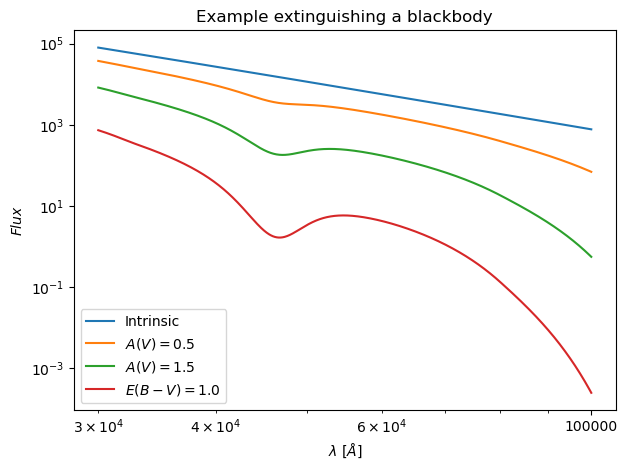

In [10]:
# NBVAL_SKIP
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel('$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()

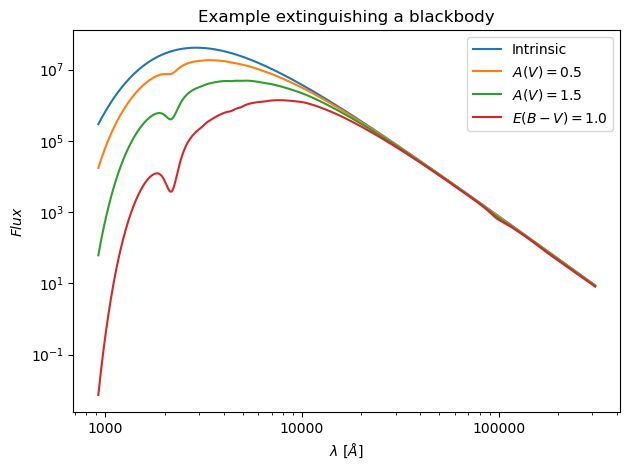

In [11]:
# NBVAL_SKIP
# generate wavelengths between 0.092 and 31 microns
#    within the valid range for the Gordon23 R(V) dependent relationship
lam = jnp.logspace(np.log10(0.092), np.log10(31.0), num=1000)

# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin

# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

# initialize the model
ext = Gordon23(Rv=3.1)

# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = flux*ext.extinguish(lam, Av=0.5)
flux_ext_av15 = flux*ext.extinguish(lam, Av=1.5)
flux_ext_ebv10 = flux*ext.extinguish(lam, Ebv=1.0)

# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

# Run the pipeline with dust


In [1]:

# NBVAL_SKIP
ILLUSTRIS_API_KEY="c0112e1fa11489ef0e6164480643d1c8"

import os
os.environ["SPS_HOME"] = '/Users/buck/Documents/Nexus/codes/fsps'


In [2]:
#NBVAL_SKIP

import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": ILLUSTRIS_API_KEY,
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 5000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
        "dust": {
            "extinction_model": "Cardelli89", #"Gordon23", 
            "dust_to_gas_ratio": 0.01, # need to check Remyer's paper
            "dust_to_metals_ratio": 0.4, # do we need this ratio if we set the dust_to_gas_ratio?
            "dust_grain_density": 3.5, # g/cm^3 #check this value
            "Rv": 3.1,
        },
    },        
}

2025-02-13 15:19:50,327 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-02-13 15:19:50,327 - rubix - INFO - Rubix version: 0.0.post337+g16c3984.d20250129
/Users/buck/Documents/Nexus/Projects/rubix/rubix/spectra/dust/dust_extinction.py:86: SyntaxWarning: invalid escape sequence '\l'
  """
/Users/buck/Documents/Nexus/Projects/rubix/rubix/spectra/dust/dust_extinction.py:147: SyntaxWarning: invalid escape sequence '\S'
  """


In [3]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

rubixdata = pipe.run()

/Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-02-13 15:19:50,545 - rubix - INFO - Getting rubix data...
2025-02-13 15:19:50,545 - rubix - INFO - Rubix galaxy file already exists, skipping conversion
2025-02-13 15:19:50,582 - rubix - INFO - Centering stars particles
2025-02-13 15:19:51,179 - rubix - WARNING - The Subset value is set in config. Using only subset of size 5000 for stars
2025-02-13 15:19:51,197 - rubix - INFO - Centering gas particles
2025-02-13 15:19:51,414 - rubix - WARNING - The Subset value is set in config. Using only subset of size 5000 for gas
2025-02-13 15:19:51,415 - rubix - INFO - Data loaded with 5000 star particles and 5000 gas particles.
2025-02-13 15:19:51,416 - rubix - INFO - Setting up the pipeline...
2025-02-13 15:19:51,416 - rubix - DEBUG - Pipeline Configuration: {'T

In [4]:
# NBVAL_SKIP
ILLUSTRIS_API_KEY="c0112e1fa11489ef0e6164480643d1c8"

import os
os.environ["SPS_HOME"] = '/Users/buck/Documents/Nexus/codes/fsps'

In [5]:
#NBVAL_SKIP

import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_dusty_ifu"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": ILLUSTRIS_API_KEY,
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 5000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
        "dust": {
            "extinction_model": "Cardelli89", #"Gordon23", 
            "dust_to_gas_ratio": 0.01, # need to check Remyer's paper
            "dust_to_metals_ratio": 0.4, # do we need this ratio if we set the dust_to_gas_ratio?
            "dust_to_gas_model": "broken power law fit", # from Remyer's paper see their Table 1
            "Xco": "Z", # from Remyer's paper, see their Table 1
            "dust_grain_density": 3.0, # #check this value, reverse engeneered from Ibarrra-Medel 2018
            "Rv": 3.1,
        },
    },        
}

In [6]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

rubixdata_dust = pipe.run()

/Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/factory.py:24: UserWarning: No telescope config provided, using default stored in /Users/buck/Documents/Nexus/Projects/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-02-13 15:19:53,713 - rubix - INFO - Getting rubix data...
2025-02-13 15:19:53,713 - rubix - INFO - Rubix galaxy file already exists, skipping conversion
2025-02-13 15:19:53,741 - rubix - INFO - Centering stars particles
2025-02-13 15:19:54,072 - rubix - WARNING - The Subset value is set in config. Using only subset of size 5000 for stars
2025-02-13 15:19:54,076 - rubix - INFO - Centering gas particles
2025-02-13 15:19:54,106 - rubix - WARNING - The Subset value is set in config. Using only subset of size 5000 for gas
2025-02-13 15:19:54,108 - rubix - INFO - Data loaded with 5000 star particles and 5000 gas particles.
2025-02-13 15:19:54,127 - rubix - INFO - Setting up the pipeline...
2025-02-13 15:19:54,128 - rubix - DEBUG - Pipeline Configuration: {'T

(25, 25, 3721)
(25, 25, 3721)


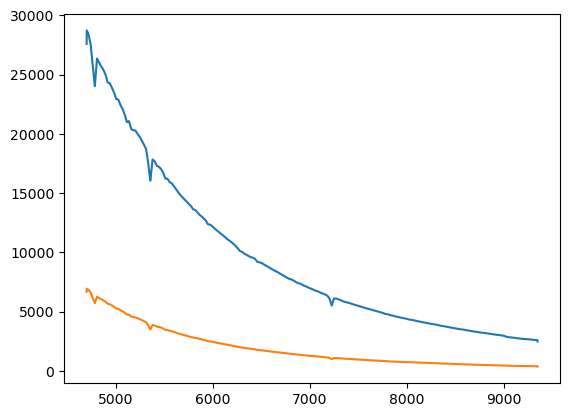

In [7]:
#NBVAL_SKIP
wave = pipe.telescope.wave_seq

spectra = rubixdata.stars.datacube # Spectra of all stars
dusty_spectra = rubixdata_dust.stars.datacube # Spectra of all stars
print(spectra.shape)
print(dusty_spectra.shape)

plt.plot(wave, spectra[12,12,:])
plt.plot(wave, dusty_spectra[12,12,:])

# Let's plot some example spectra

In [10]:
#NBVAL_SKIP
from rubix import config
from rubix.spectra.dust.extinction_models import *
import jax

In [151]:
#NBVAL_SKIP
x = np.arange(len(stars_mass[0]))
shuffle = np.random.choice(x.shape[0], x.shape[0], replace = False)

stars_mass = stars_mass[:,shuffle]
stars_coords = stars_coords[:,shuffle]
stars_pixel_assignment = stars_pixel_assignment[:,shuffle]

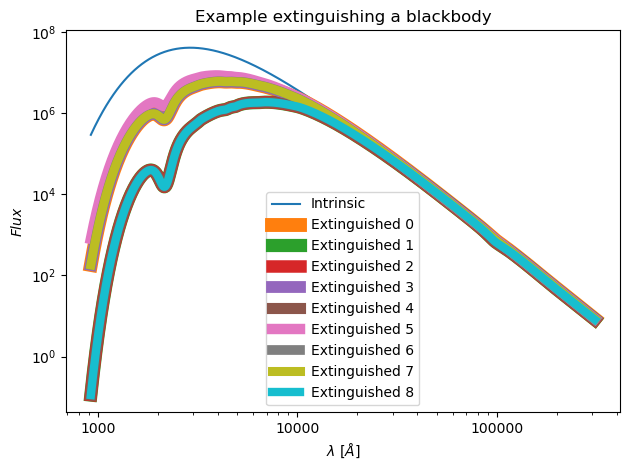

In [166]:
#NBVAL_SKIP
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
for i in range(9):
    ax.plot(wavelengths, extincted_ssp_template_fluxes[i], label=f'Extinguished {i}', lw=10-(i*.5))

ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()

In [91]:
#NBVAL_SKIP
gas_mass = jnp.array([[1.0, 1.0]]) * 1e7
gas_coords = jnp.array([[[0.0, 0.0, 1.0], [0.0, 0.0, 2.0]]])
gas_pixel_assignment = jnp.array([[0, 0]])

stars_pixel_assignment = jnp.array([[0, 0, 0]])
stars_coords = jnp.array([[[0.0, 0.0, 0.0], [0.0, 0.0, 1.75], [0.0, 0.0, 3.0]]])
stars_mass = jnp.array([[1.0, 1.0, 1.0]]) * 1e7

lam = jnp.logspace(np.log10(0.092), np.log10(31.0), num=1000)
# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin
# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)
stars_spectra = jnp.array([flux, flux, flux])

n_spaxels = 3
spaxel_area = 1.0

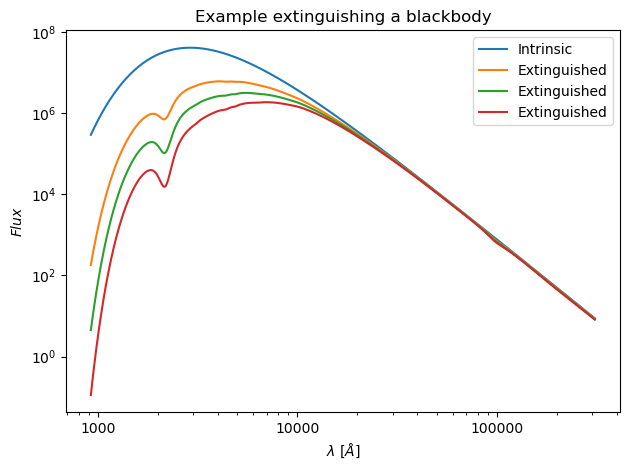

In [73]:
#NBVAL_SKIP
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
for i in range(3):
    ax.plot(wavelengths, extincted_ssp_template_fluxes[i], label='Extinguished')

ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()

In [308]:
#NBVAL_SKIP
def efficient_spaxel_extinction(gas_mass, gas_coords, gas_pixel_assignment, stars_mass, stars_coords, stars_pixel_assignment, stars_spectra, wavelength, n_spaxels, spaxel_area):

    # sort the arrays by pixel assignment and z position
    gas_sorted_idx = jnp.lexsort((gas_coords[0,:,2], gas_pixel_assignment[0]))
    stars_sorted_idx = jnp.lexsort((stars_coords[0,:,2], stars_pixel_assignment[0]))

    print(gas_sorted_idx)
    print(stars_sorted_idx)

    # determine the segment boundaries
    spaxel_IDs = jnp.arange(n_spaxels)
    # we use searchsorted to get the segment boundaries for the gas and stars arrays and we concatenate the length of the sorted arrays to get the last segment boundary.
    gas_segment_boundaries = jnp.concatenate([jnp.searchsorted(gas_pixel_assignment[0][gas_sorted_idx], spaxel_IDs, side='left'), jnp.array([len(gas_sorted_idx)])])
    stars_segment_boundaries = jnp.concatenate([jnp.searchsorted(stars_pixel_assignment[0][stars_sorted_idx], spaxel_IDs, side='left'), jnp.array([len(stars_sorted_idx)])])

    print(f"gas segment boundaries {gas_segment_boundaries}")
    print(f"stars segment boundaries {stars_segment_boundaries}")
    
    dust_mass = gas_mass[0] * 0.01

    dust_grain_density = 3.0
    extinction = calculate_extinction(dust_mass[gas_sorted_idx], dust_grain_density) / spaxel_area

    print(extinction)

    ext_model = "Gordon23"
    Rv = config["ssp"]["dust"]["Rv"]
    ext_model_class = Rv_model_dict[ext_model]
    ext = ext_model_class(Rv=Rv)

    # Preallocate arrays
    Av_array = jnp.zeros_like(stars_mass[0])

    def body_fn(carry, idx):
        Av_array = carry
        gas_start, gas_end = gas_segment_boundaries[idx], gas_segment_boundaries[idx + 1]
        star_start, star_end = stars_segment_boundaries[idx], stars_segment_boundaries[idx + 1]

        # Create masks for the current segment
        gas_mask = (jnp.arange(gas_sorted_idx.shape[0]) >= gas_start) & (jnp.arange(gas_sorted_idx.shape[0]) < gas_end)
        star_mask = (jnp.arange(stars_sorted_idx.shape[0]) >= star_start) & (jnp.arange(stars_sorted_idx.shape[0]) < star_end)
        gas_mask2 = jnp.where(gas_mask, 1, 1e10)

        cumulative_dust_mass = jnp.cumsum(extinction * gas_mask) * gas_mask
        jax.debug.print("cumulation {}", cumulative_dust_mass)
        
        # concatenate a zero at the front of the array to avoid interpolation errors
        #xp_arr = jnp.concatenate([jnp.array([0.0]), gas_coords[0,:,2][gas_sorted_idx] * gas_mask2])
        #fp_arr = jnp.concatenate([jnp.array([0.0]), cumulative_dust_mass])
        xp_arr = gas_coords[0,:,2][gas_sorted_idx] * gas_mask2
        fp_arr = cumulative_dust_mass
        
        xp_arr, fp_arr = jax.lax.sort_key_val(xp_arr, fp_arr)
        jax.debug.print("xp_arr: {}", xp_arr)
        jax.debug.print("fp_arr: {}", fp_arr)

        interpolated_column_density = jnp.interp(stars_coords[0,:,2][stars_sorted_idx], xp_arr, fp_arr, left='extrapolate') * star_mask #, left='extrapolate') * star_mask #, right='extrapolate')
        
        #interpolated_column_density = jnp.interp(stars_coords[0,:,2][stars_sorted_idx], gas_coords[0,:,2][gas_sorted_idx] * gas_mask2, cumulative_dust_mass, left='extrapolate') * star_mask #, right='extrapolate')
        jax.debug.print("interpolation: {}", interpolated_column_density)
        jax.debug.print("stars positions: {}", stars_coords[0,:,2][stars_sorted_idx] * star_mask)
        jax.debug.print("gas positions: {}", gas_coords[0,:,2][gas_sorted_idx] * gas_mask)

        # calculate the extinction for each star
        Av_array += interpolated_column_density
        
        return Av_array, None

    Av_array, _ = jax.lax.scan(body_fn, Av_array, spaxel_IDs)

    print(Av_array)
    # get the extinguished SSP flux for different amounts of dust
    # Vectorize the extinction calculation using vmap
    extinguish_vmap = jax.vmap(ext.extinguish, in_axes=(None, 0))
    # note, we need to pass wavelength in microns here to the extinction model.
    # in Rubix the wavelength is in Angstroms, so we divide by 1e4 to get microns. 
    extinction = extinguish_vmap(wavelength/1e4, Av_array)

    # undo the sorting of the stars
    undo_sort = jnp.argsort(stars_sorted_idx)
    extinction = extinction[undo_sort]

    # Apply the extinction to the SSP fluxes
    extincted_ssp_template_fluxes = stars_spectra * extinction

    return extincted_ssp_template_fluxes

In [268]:
#NBVAL_SKIP
gas_mass = jnp.array([[1.0, 1.0, 1.0, 1.0]]) * 1e7
gas_coords = jnp.array([[[0.0, 0.0, 0.5], [0.0, 0.0, 1.5], [0.0, 0.0, 0.5], [0.0, 0.0, 1.5], [0.0, 0.0, 2.5], [0.0, 0.0, 2.5]]])
gas_pixel_assignment = jnp.array([[0, 0, 1, 1, 1, 2]])

stars_pixel_assignment = jnp.array([[0, 0, 0, 0, 1, 1, 1, 2, 2, 2]])
stars_coords = jnp.array([[[0.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 2.0], [0.0, 0.0, 3.0], [0.0, 0.0, 1.0], [0.0, 0.0, 2.0], [0.0, 0.0, 3.0], [0.0, 0.0, 2.0], [0.0, 0.0, 3.0], [0.0, 0.0, 4.0]]])
stars_mass = jnp.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]) * 1e7

lam = jnp.logspace(np.log10(0.092), np.log10(31.0), num=1000)
# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin
# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)
stars_spectra = jnp.array([flux, flux, flux, flux, flux, flux, flux, flux, flux, flux])

n_spaxels = 3
spaxel_area = 1.0

In [309]:
#NBVAL_SKIP
extincted_ssp_template_fluxes = efficient_spaxel_extinction(gas_mass, gas_coords, gas_pixel_assignment, stars_mass, stars_coords, stars_pixel_assignment, stars_spectra, wavelengths, n_spaxels, spaxel_area)

[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8 9]
gas segment boundaries [0 2 5 6]
stars segment boundaries [ 0  4  7 10]
[1.3078867 1.3078867 1.3078867 1.3078867 1.3078867 1.3078867]
cumulation [1.3078867 2.6157734 0.        0.        0.        0.       ]
xp_arr: [5.0e-01 1.5e+00 5.0e+09 1.5e+10 2.5e+10 2.5e+10]
fp_arr: [1.3078867 2.6157734 0.        0.        0.        0.       ]
interpolation: [0.65394336 1.9618301  2.6157734  2.6157734  0.         0.
 0.         0.         0.         0.        ]
stars positions: [0. 1. 2. 3. 0. 0. 0. 0. 0. 0.]
gas positions: [0.5 1.5 0.  0.  0.  0. ]
cumulation [0.        0.        1.3078867 2.6157734 3.9236603 0.       ]
xp_arr: [5.0e-01 1.5e+00 2.5e+00 5.0e+09 1.5e+10 2.5e+10]
fp_arr: [1.3078867 2.6157734 3.9236603 0.        0.        0.       ]
interpolation: [0.        0.        0.        0.        1.9618301 3.2697167 3.9236603
 0.        0.        0.       ]
stars positions: [0. 0. 0. 0. 1. 2. 3. 0. 0. 0.]
gas positions: [0.  0.  0.5 1.5 2.5 0. ]
cumulation